# Analyzing Shark CSV

Importing usefull libraries

In [21]:
import pandas as pd
import numpy as np
import re

In [22]:
df = pd.read_csv('../../Data project - Resources/attacks_clean.csv', encoding='latin-1')

In [23]:
# Review the data again, just in case
df

,Unnamed: 0,Date,Type,Country,Area,Activity
0,0,25-Jun-2018,Boating,USA,California,Paddling
1,1,18-Jun-2018,Unprovoked,USA,Georgia,Standing
2,2,09-Jun-2018,Invalid,USA,Hawaii,Surfing
3,3,08-Jun-2018,Unprovoked,AUSTRALIA,New South Wales,Surfing
4,4,04-Jun-2018,Provoked,MEXICO,Colima,Free diving
...,...,...,...,...,...,...
6161,6297,Before 1903,Unprovoked,AUSTRALIA,Western Australia,Diving
6162,6298,Before 1903,Unprovoked,AUSTRALIA,Western Australia,Pearl diving
6163,6299,1900-1905,Unprovoked,USA,North Carolina,Swimming
6164,6300,1883-1889,Unprovoked,PANAMA,NaN,NaN


In [24]:
# There is a column called "Unnamed: 0" that is usless, must be deleted
df = df.drop(columns=['Unnamed: 0'])

### 1. Identify surfers in california

Divide data frame in different groups
 * Surfers and not surfers
 * Attacks in California and Not in California

--> 4.1 Identify all surfers

In [88]:
# As there are some activities that we don't know, we will not take them into consideration

df = df.dropna(subset=['Activity'])

In [26]:
# Identyfy all surf activities

surf_list = [e for e in list(df["Activity"]) if re.search(r"surf", str(e), re.IGNORECASE)]
all_surf = list(set(surf_list))

In [27]:
# Create a column for the attacks that we know where surfing 

df["Surf"] = np.where(df.Activity.isin(all_surf), "Surf", "No surf")

In [29]:
# Identyfy all attacks tha happened in California

cal_list = [e for e in list(df["Area"]) if re.search(r"California", str(e), re.IGNORECASE)]
all_cal = list(set(cal_list))

In [30]:
# Create a column for the attacks that happened in California 

df["California"] = np.where(df.Area.isin(all_cal), "California", "No California")

### 2. Analyze data

Analyze the data to understand if the highes percentage of attacks to surfers happened in California
 * Percentages of shark attacks to surfers
 * Percentages of shark attacks that happened in California
 * Compare percentage of shark attack to surfers that happened in California with the rest of the world

In [16]:
%matplotlib inline

In [31]:
# Analyze the percentage of attacks to surfers
df["Surf"].value_counts(normalize=True)

No surf    0.784815
Surf       0.215185
Name: Surf, dtype: float64

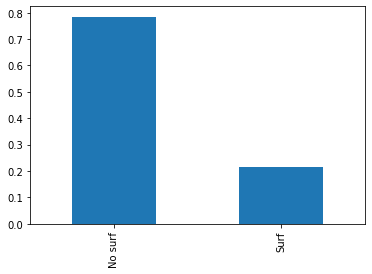

In [17]:
per_surf = df["Surf"].value_counts(normalize=True)
per_surf.plot.bar()

==> 21% of the shark attack were done to surfers

In [32]:
# Analize attacks in California vs rest of the world
df["California"].value_counts(normalize=True)

No California    0.949619
California       0.050381
Name: California, dtype: float64

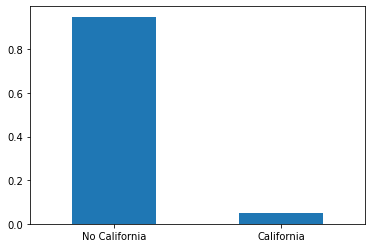

In [121]:
per_cal = df["California"].value_counts(normalize=True)
per_cal.plot.bar()

==> 5% of the shark attacks happened in California

In [34]:
# Analize just the surfer attacks that happened in California vs other places
    # Create a df with just surfer data

df_surf = df[df.Surf !='No surf']

In [35]:
# Identyfy what percentage happened in California

df_surf["California"].value_counts(normalize=True)

No California    0.910965
California       0.089035
Name: California, dtype: float64

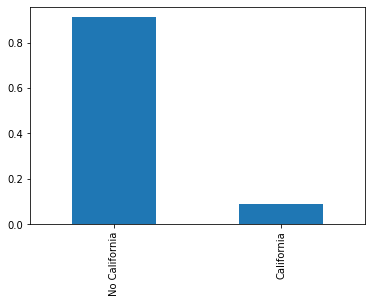

In [19]:
surf_cal = df_surf["California"].value_counts(normalize=True)
surf_cal.plot.bar()

==> 8% of the shark attacks to surfers happened in California

In [105]:
# See all data aggregated
    # Create a table with just the columns California and Surf
    
df_surf_cal = df[['Surf', 'California']]
tot_tab = df_surf_cal.pivot_table(index=['Surf'], columns=['California'], aggfunc=len, fill_value=0)
tot_tab

California,California,No California
Surf,,
No surf,176,4248
Surf,108,1105


array([<matplotlib.axes._subplots.AxesSubplot object at 0x115254590>,
      dtype=object)

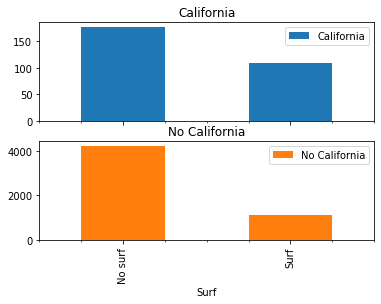

In [126]:
tot_tab.plot.bar(subplots=True)

In [100]:
# Show table by parcentages

per_tot = tot_tab.div(len(df.index)).mul(100).round(2)
per_tot

California,California,No California,All
Surf,,,
No surf,3.12,75.36,78.48
Surf,1.92,19.60,21.52
All,5.04,94.96,100.00


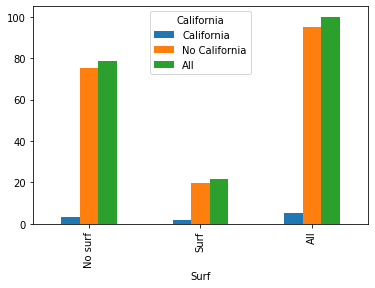

In [128]:
per_tot.plot.bar()

#### --> Check if there is any place whit more than 8% of the attacks

In [36]:
# Identify the areas where happened 8% or more of the attacks

per_by_area = df_surf["Area"].value_counts(normalize=True)
top_surf_attacks = per_by_area.loc[per_by_area > 0.05]
top_surf_attacks

Florida                  0.323358
New South Wales          0.108063
California               0.087282
Hawaii                   0.068163
Eastern Cape Province    0.057357
Name: Area, dtype: float64

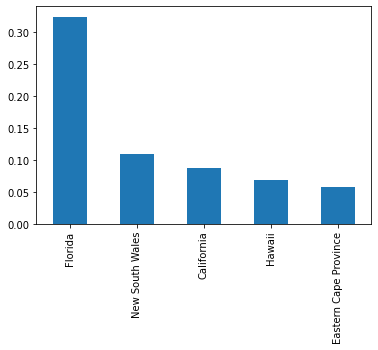

In [120]:
top_surf_attacks.plot.bar()

# Conclusion

==> Based on this data we can say that California IS NOT the arrea where the highest percentage of shark attacks to surfers happened